In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:80% !important; }</style>'))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from pylab import meshgrid, cm, contour,clabel,colorbar,axis,title,show
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import expm, sinm, cosm
from numpy import linalg as LA
from matplotlib.pyplot import figure

In [3]:
# constants:
Ej = 1
alpha = 0.8
nmax = 5
Ec = Ej/40
flux = np.linspace(0.3, 0.7, 1000)
A = (1 + alpha)/(1 + 2 * alpha)
B = alpha/(1 + 2 * alpha)
N = np.diag(np.linspace(-nmax, nmax, 2*nmax+1))
idn = np.identity(2*nmax+1)

N1sq = (np.kron(np.matmul(N, N), idn))
N2sq = (np.kron(idn, np.matmul(N, N)))
T = 4*A*Ec*(N1sq + N2sq)+ 8*B*Ec*np.kron(N, N)

SG = np.zeros((2*nmax+1, 2*nmax+1), dtype = float)
SGd = np.zeros((2*nmax+1, 2*nmax+1), dtype = float)

for i in range (1, 2*nmax+1):
    SG[i][i-1] = 1
    SGd[i-1][i] = 1
SGcos = (0.5)*(SG+SGd)
SGsin = (-0.5j)*(SGd - SG)

CC = np.matmul(np.kron(idn, SGcos), np.kron(SGcos, idn)) + np.matmul(np.kron(idn, SGsin), np.kron(SGsin, idn))
SS = np.matmul(np.kron(idn, SGsin), np.kron(SGcos, idn)) - np.matmul(np.kron(idn, SGcos), np.kron(SGsin, idn))

In [4]:
important_eig = [[float for i in range (1)] for j in range (len(flux))]
for i in range (0, len(flux)):
    C1 = np.cos(2*np.pi*flux[i])*CC
    S1 = np.sin(2*np.pi*flux[i])*SS
    U = -Ej*(np.kron(SGcos,idn) + np.kron(idn,SGcos) + alpha*(C1-S1))
    H = T + U
    temp = LA.eig(H)[0]
    temp.sort()
    important_eig[i] = temp[:5]

C:\Users\defne\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


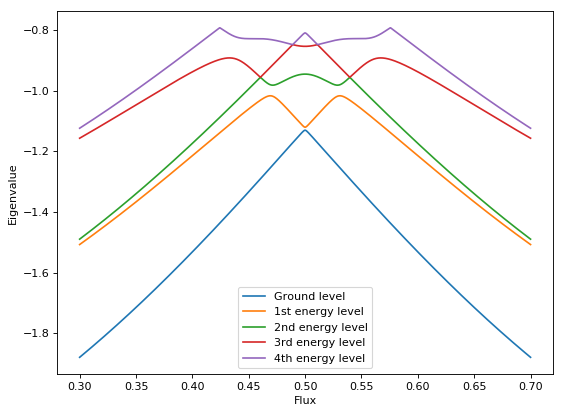

In [5]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plot_objs = plt.plot(flux, important_eig, label = 'Ground state')
plt.xlabel('Flux')
plt.ylabel('Eigenvalue')
plt.legend(plot_objs, ('Ground level', '1st energy level', '2nd energy level', 
                       '3rd energy level', '4th energy level'))
